In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [15]:
# Load the dataset
df = pd.read_csv('/Users/defeee/Documents/GitHub/FormAI-ML/Computer_Vision/plank_data.csv')
df

,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_hip_x,left_hip_y,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,label
0,0.642386,0.583271,0.548058,0.597824,0.443711,0.594250,0.403391,0.574825,0.403391,0.574825,0.297642,0.636858,0.297642,0.636858,0.190567,0.676403,0
1,0.679859,0.565745,0.710770,0.591013,0.475935,0.561199,0.481324,0.581487,0.481324,0.581487,0.295335,0.636551,0.295335,0.636551,0.104193,0.658410,0
2,0.721897,0.397889,0.756285,0.455613,0.521475,0.431144,0.528335,0.479965,0.528335,0.479965,0.325305,0.538046,0.141661,0.555853,0.127540,0.576387,0
3,0.761117,0.285076,0.807791,0.315343,0.508633,0.373220,0.516758,0.410588,0.516758,0.410588,0.300992,0.550675,0.108388,0.588610,0.086611,0.607155,0
4,0.670264,0.600633,0.694206,0.643925,0.471349,0.598748,0.479396,0.630939,0.479396,0.630939,0.291745,0.670514,0.124032,0.696069,0.112590,0.707900,0
5,0.730523,0.417255,0.745758,0.443812,0.510914,0.451097,0.518280,0.477669,0.518280,0.477669,0.320076,0.568231,0.320076,0.568231,0.127585,0.588429,0
6,0.638327,0.490312,0.650074,0.520804,0.514262,0.503733,0.514098,0.524496,0.514098,0.524496,0.406551,0.556616,0.406551,0.556616,0.294681,0.585080,0
7,0.760431,0.488503,0.775595,0.527959,0.513389,0.541234,0.510479,0.558777,0.510479,0.558777,0.320399,0.603970,0.320399,0.603970,0.111138,0.598453,0
8,0.758092,0.433545,0.783267,0.439878,0.507335,0.454236,0.508589,0.465711,0.508589,0.465711,0.292282,0.511751,0.120436,0.524580,0.086387,0.536030,0
9,0.448387,0.568642,0.463995,0.538453,0.645906,0.637069,0.645627,0.616969,0.671335,0.912682,0.671335,0.912682,0.815936,0.891380,0.787729,0.843842,2


<Axes: xlabel='label'>

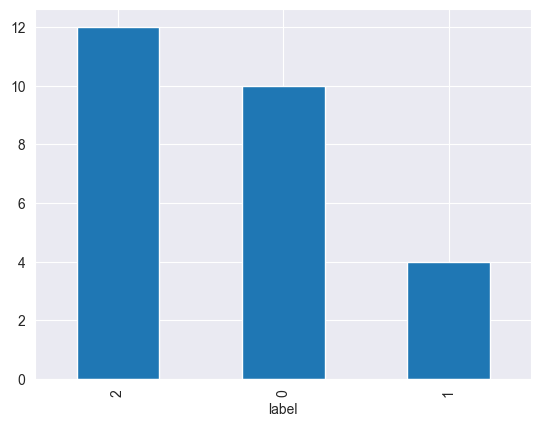

In [16]:
# plot the label distribution between 0, 1 and 2 value counts
df["label"].value_counts().plot(kind='bar')


In [17]:
df.columns

Index(['left_shoulder_x', 'left_shoulder_y', 'right_shoulder_x',
       'right_shoulder_y', 'left_hip_x', 'left_hip_y', 'right_hip_x',
       'right_hip_y', 'left_knee_x', 'left_knee_y', 'right_knee_x',
       'right_knee_y', 'left_ankle_x', 'left_ankle_y', 'right_ankle_x',
       'right_ankle_y', 'label'],
      dtype='object')

In [18]:
# check for missing values
df.isnull().sum()

left_shoulder_x     0
left_shoulder_y     0
right_shoulder_x    0
right_shoulder_y    0
left_hip_x          0
left_hip_y          0
right_hip_x         0
right_hip_y         0
left_knee_x         0
left_knee_y         0
right_knee_x        0
right_knee_y        0
left_ankle_x        0
left_ankle_y        0
right_ankle_x       0
right_ankle_y       0
label               0
dtype: int64

In [19]:
# drop the missing values
df = df.dropna()
df.isnull().sum()

left_shoulder_x     0
left_shoulder_y     0
right_shoulder_x    0
right_shoulder_y    0
left_hip_x          0
left_hip_y          0
right_hip_x         0
right_hip_y         0
left_knee_x         0
left_knee_y         0
right_knee_x        0
right_knee_y        0
left_ankle_x        0
left_ankle_y        0
right_ankle_x       0
right_ankle_y       0
label               0
dtype: int64

# Preprocessing

In [20]:
# Split the dataset into features and labels
X = df.drop('label', axis=1)
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the NumPy arrays to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# Create a DataLoader
trainloader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
testloader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)


In [21]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 3)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

In [22]:
# Initialize the model
model = Net()

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [23]:
# Train the model
n_epochs = 100
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    model.train()
    for inputs, targets in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_losses[it] = loss.item()

    model.eval()
    for inputs, targets in testloader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_losses[it] = loss.item()

    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {train_losses[it]:.4f}, Test Loss: {test_losses[it]:.4f}')
    

Epoch 1/100, Train Loss: 1.0907, Test Loss: 0.9930
Epoch 2/100, Train Loss: 0.9026, Test Loss: 0.9187
Epoch 3/100, Train Loss: 0.7537, Test Loss: 0.8736
Epoch 4/100, Train Loss: 0.6323, Test Loss: 0.8654
Epoch 5/100, Train Loss: 0.5157, Test Loss: 0.8973
Epoch 6/100, Train Loss: 0.4005, Test Loss: 0.9885
Epoch 7/100, Train Loss: 0.3084, Test Loss: 1.1186
Epoch 8/100, Train Loss: 0.2520, Test Loss: 1.2331
Epoch 9/100, Train Loss: 0.2060, Test Loss: 1.3429
Epoch 10/100, Train Loss: 0.1639, Test Loss: 1.5132
Epoch 11/100, Train Loss: 0.1263, Test Loss: 1.7422
Epoch 12/100, Train Loss: 0.1034, Test Loss: 2.0063
Epoch 13/100, Train Loss: 0.0837, Test Loss: 2.2873
Epoch 14/100, Train Loss: 0.0550, Test Loss: 2.5970
Epoch 15/100, Train Loss: 0.0371, Test Loss: 2.9193
Epoch 16/100, Train Loss: 0.0256, Test Loss: 3.2365
Epoch 17/100, Train Loss: 0.0179, Test Loss: 3.5669
Epoch 18/100, Train Loss: 0.0141, Test Loss: 3.9131
Epoch 19/100, Train Loss: 0.0101, Test Loss: 4.2637
Epoch 20/100, Train L

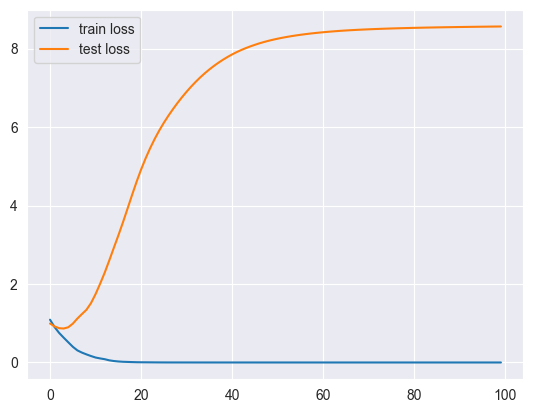

In [24]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()


In [25]:
# Accuracy
n_correct = 0.
n_total = 0.
for inputs, targets in trainloader:
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
train_acc = n_correct / n_total

train_acc
    

1.0

Confusion matrix, without normalization
[[1 0 1]
 [1 0 0]
 [0 0 3]]


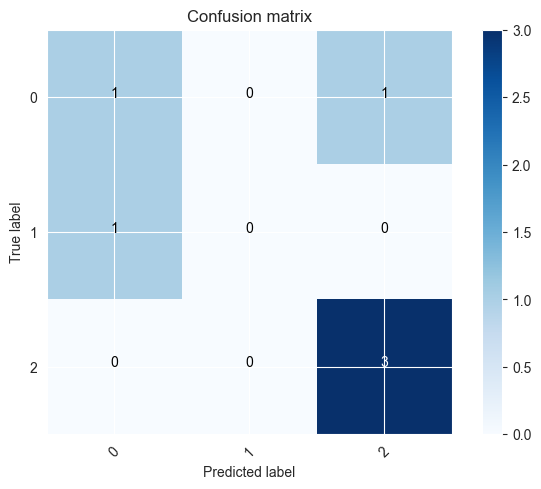

In [26]:
# confusion matrix plot
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Get all predictions in an array and plot the confusion matrix
model.eval()
predictions = []
targets = []
for inputs, targets_batch in testloader:
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    predictions.extend(preds)
    targets.extend(targets_batch)

predictions = torch.stack(predictions).cpu()
targets = torch.stack(targets).cpu()
cm = confusion_matrix(targets, predictions)
plot_confusion_matrix(cm, list(range(3)))

In [27]:
torch.save(model, '/Users/defeee/Documents/GitHub/FormAI-ML/Models/Core/Plank/model.pth')

In [28]:
df.columns

Index(['left_shoulder_x', 'left_shoulder_y', 'right_shoulder_x',
       'right_shoulder_y', 'left_hip_x', 'left_hip_y', 'right_hip_x',
       'right_hip_y', 'left_knee_x', 'left_knee_y', 'right_knee_x',
       'right_knee_y', 'left_ankle_x', 'left_ankle_y', 'right_ankle_x',
       'right_ankle_y', 'label'],
      dtype='object')